# P4 Scoring Model

## Import

In [118]:
import seaborn as sns
import pandas as pd 
import os
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from IPython.display import display, HTML
# numpy and pandas for data manipulation

In [42]:
def display_info(message="Variables attendus: message='texte de ton choix' + color = 'info=green, explain=yellow, else=red'", color="inter"):
    if color == "info":
        display(HTML(f"""
        <h3 style='color:green'>Informations:</h3>
        <p style='color:green'>{message}</p>"""))
    elif color == "explain":
        display(HTML(f"""
        <h3 style='color:yellow'>Explications:</h3>
        <p style='color:yellow'>{message}</p>"""))
    else:
        display(HTML(f"""
        <h3 style='color:red'>Interprétations:</h3>
        <p style='color:red'>{message}</p>"""))

In [59]:
display_info("Voici la liste des différents fichiers disponibles:","info")
print(os.listdir("../datas"))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [60]:
app_train = pd.read_csv('../datas/application_train.csv')
display_info(f'Training data {app_train.shape[0]} lignes et {app_train.shape[1]} colonnes)',"inter")
# app_train.head()

In [46]:
hc_columns = pd.read_csv('../datas/HomeCredit_columns_description.csv',encoding="ISO-8859-1")
display_info(f'HomeCredit columns shape: {hc_columns.shape}',"explain")
hc_columns

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [61]:
# bureau_balance = pd.read_csv('../datas/bureau_balance.csv')
# bureau = pd.read_csv('../datas/bureau.csv')
# credit_card_balance = pd.read_csv('../datas/credit_card_balance.csv')
# installments_payments = pd.read_csv('../datas/installments_payments.csv',encoding="ISO-8859-1")
# pos_cash_balance = pd.read_csv('../datas/POS_CASH_balance.csv',encoding="ISO-8859-1")
# previous_application = pd.read_csv('../datas/previous_application.csv',encoding="ISO-8859-1")


In [62]:
# columns_app_test = set(app_test.columns)
# columns_app_train = set(app_train.columns)
# columns_bureau_balance = set(bureau_balance.columns)
# columns_bureau = set(bureau.columns)
# columns_credit_card_balance = set(credit_card_balance.columns)
# columns_hc_columns = set(hc_columns.columns)
# columns_install_payments = set(installments_payments.columns)
# columns_pos_cash = set(pos_cash_balance.columns)
# columns_previous_application = set(previous_application.columns)
# columns_sample_sub = set(sample_sub.columns)

# common_columns = (
# columns_app_train
# # columns_app_test.intersection(columns_app_train)
# # .intersection(columns_bureau_balance )
# .intersection(columns_bureau)
# .intersection(columns_credit_card_balance)
# # .intersection(columns_hc_columns)
# .intersection(columns_install_payments)
# .intersection(columns_pos_cash)
# .intersection(columns_previous_application)
# .intersection(columns_sample_sub)
# )

# display_info(f"Colonnes en commun : {common_columns}","inter")

In [63]:
# merged_df=pd.merge(app_train[['SK_ID_CURR','AMT_INCOME_TOTAL']],
#                   bureau[['SK_ID_CURR','AMT_CREDIT_SUM_DEBT']],
#                   on='SK_ID_CURR', how='left')

# merged_df['Debt_Income_Ratio'] = merged_df['AMT_CREDIT_SUM_DEBT'] / merged_df['AMT_INCOME_TOTAL']

In [64]:
app_train_clean = app_train.drop_duplicates();
display_info(f"""App train datas without duplicate: {app_train.shape[0]} lignes, {app_train.shape[1]} colonnes""")
# app_train_clean.shape

# merged_df.drop(['SK_ID_CURR'], axis=1).describe()

In [68]:
app_train.info(verbose="true")
display_info("Nous avons des colonnes de nombres et des colonnes de texte",'info')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [70]:
print(app_train.describe())
display_info("SK_ID_CURR est l'identifiant du crédit, nous allons nous concentrer sur les autres colonnes","explain")

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [52]:
def getQuantitaiveDatas(data):
    quantDatas = data.select_dtypes(include=['float64','int64'])
    return quantDatas

In [85]:
data=getQuantitaiveDatas(app_train_clean.drop('SK_ID_CURR', axis=1))
data

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

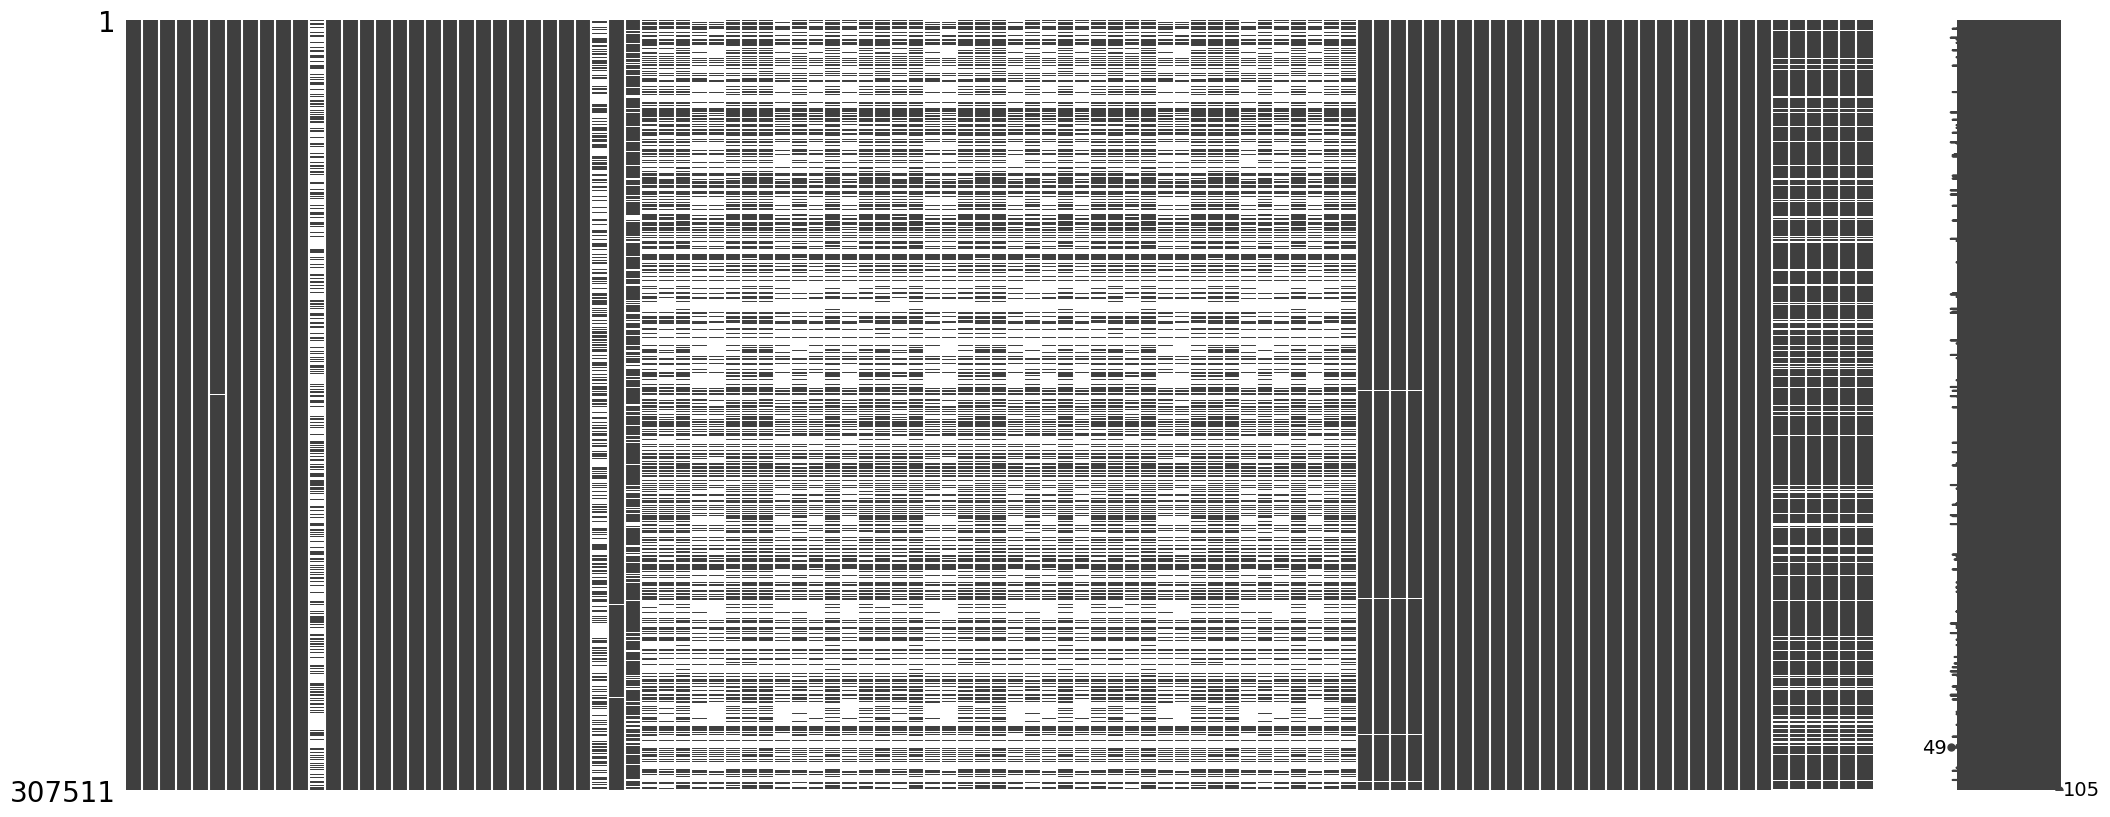

In [77]:
msno.matrix(data)

## Exploration des données

In [139]:
columnsToKeep = ['TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_CHILDREN','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_REGISTRATION','REGION_POPULATION_RELATIVE','OWN_CAR_AGE']
# data = data.drop(data.columns[data.columns.str.startswith('FLAG')],axis=1)
data[columnsToKeep]

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_CHILDREN,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,OWN_CAR_AGE
0,1,202500.0,406597.5,24700.5,351000.0,-9461,-637,0,0.083037,0.262949,0.139376,-3648.0,0.018801,NaN
1,0,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,0,0.311267,0.622246,NaN,-1186.0,0.003541,NaN
2,0,67500.0,135000.0,6750.0,135000.0,-19046,-225,0,NaN,0.555912,0.729567,-4260.0,0.010032,26.0
3,0,135000.0,312682.5,29686.5,297000.0,-19005,-3039,0,NaN,0.650442,NaN,-9833.0,0.008019,NaN
4,0,121500.0,513000.0,21865.5,513000.0,-19932,-3038,0,NaN,0.322738,NaN,-4311.0,0.028663,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,-9327,-236,0,0.145570,0.681632,NaN,-8456.0,0.032561,NaN
307507,0,72000.0,269550.0,12001.5,225000.0,-20775,365243,0,NaN,0.115992,NaN,-4388.0,0.025164,NaN
307508,0,153000.0,677664.0,29979.0,585000.0,-14966,-7921,0,0.744026,0.535722,0.218859,-6737.0,0.005002,NaN
307509,1,171000.0,370107.0,20205.0,319500.0,-11961,-4786,0,NaN,0.514163,0.661024,-2562.0,0.005313,NaN


In [140]:
data

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
data.head()
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 105 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40)
memory usage: 246.3 MB


TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 105, dtype: int64

<Axes: >

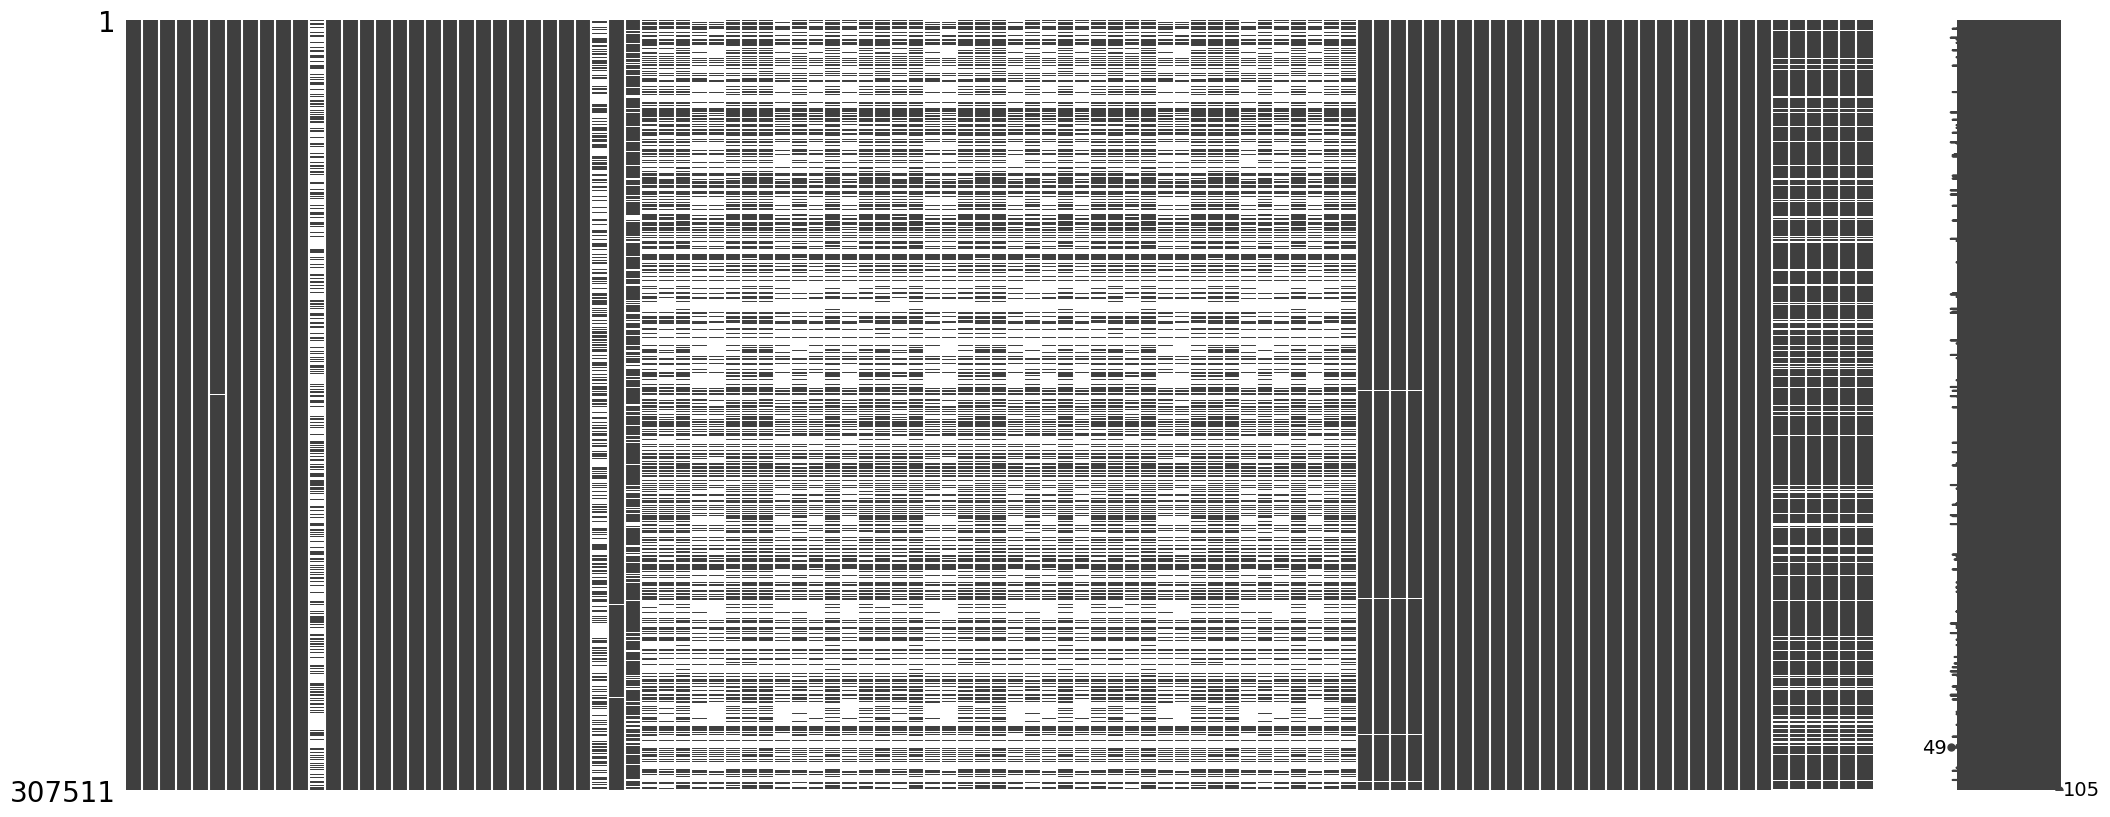

In [142]:
display_info("Affichage des valeurs manquantes des colonnes selectionnées","info")
msno.matrix(data)

In [135]:
def distribData(data):
    nbr_cols= len(data.columns);
    cols_per_rows= 3;
    num_rows = int((nbr_cols/cols_per_rows) + (nbr_cols % cols_per_rows>0));

    fig, axes=plt.subplots(num_rows, cols_per_rows, figsize=(cols_per_rows * 5, num_rows *4))
    axes=axes.flatten()

    for i, col in enumerate(data.columns):
        sns.histplot(data=data, x=col, ax=axes[i])

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

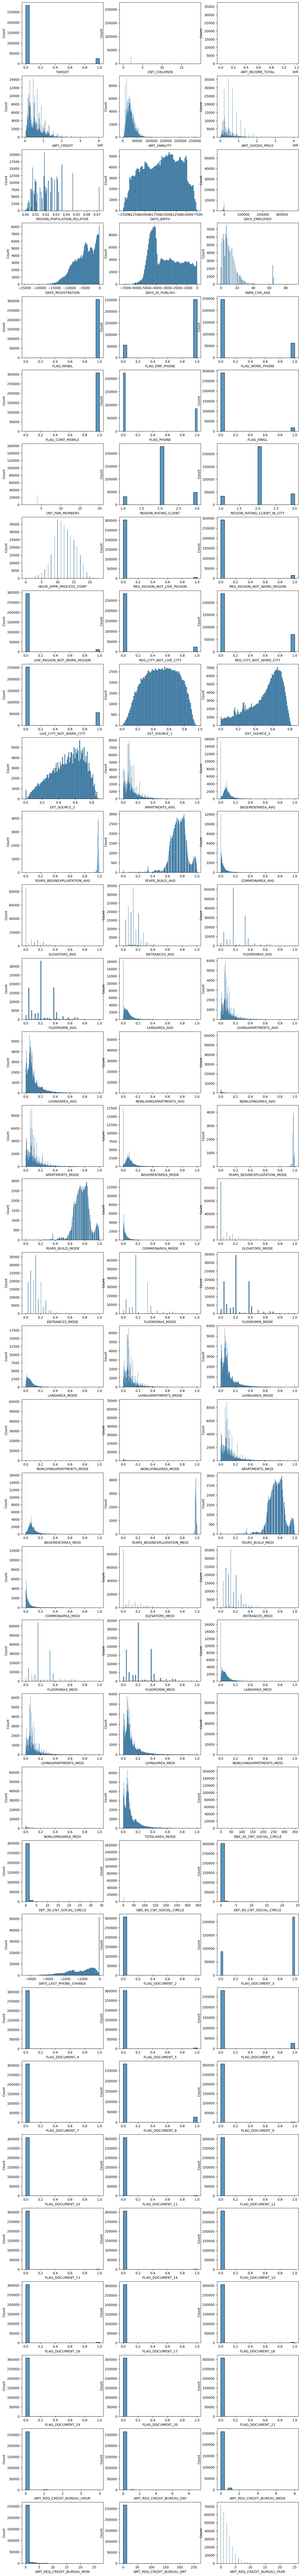

In [143]:
distribData(data)
display_info("Distribution des différentes variables quantitative","info")

<Axes: >

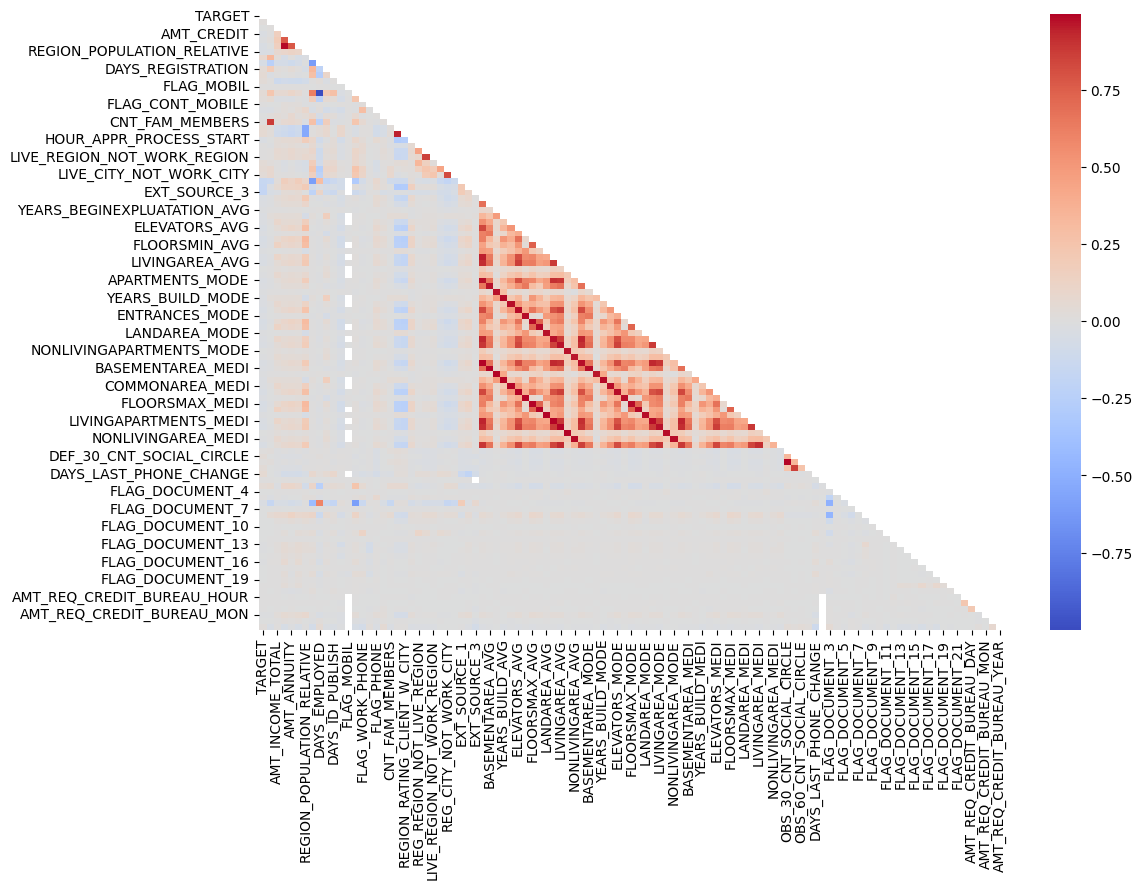

In [147]:
display_info("Exploration des variables quantitative via la matrice de correlation","info")
corr=data.corr()
matrix =np.triu(corr)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, fmt='.2f', cmap='coolwarm', mask=matrix)
